# Práctica 1
# Proyecto Señal de Cambio Climático: Índice FD (Freezing Days) en Escandinavia durante el Invierno


## Autores: Pablo Menezo Camino y Óscar Mirones Alonso

### Breve resumen del estudio

En la presente, práctica se buscará estudiar señales de cambio climático en la región de Escandinavia, principalmente considerando los países de Suecia, Noruega, Dinamarca y Finlandia. También se podrá observar el comportamiento de esta señal en otros países que no pertecen a Escandinavia (debido a la ventana de longitud y latitud escogida), como los países cercanos al Mar Báltico : Polonia, Lituania, Estonia y Letonia.
Para ello se ha elegido como índice de cambio climático FD. FD indica el número de días con heladas (Freezing Days). Es decir, el conteo de días cuando la temperatura mínima diaría es menor que 0 ºC. 

La motivación de estudiar este índice es debido a que siempre que nos presentan una señal de cambio climático suele proyectarse sobre la temperatura máxima o la temperatura media. Entonces, nosotros hemos elegido este índice para observar de que modo puede variar, buscando en lugar del clásico aumento de la temperatura máxima, observando como se comporta la temperatura mínima. Además, hemos seleccionado regiones frías de Europa para ver este impacto en zonas en las que pondera un clima generalmente frío ya que es donde tiene una mayor incidencia.

Se estudiará solamente en la estación de invierno, con lo cual estaría formado por los meses de Diciembre, Enero y Febrero. Queremos analizarlo para ver la repercusión del cambio climático sobre este índice. Por ejemplo, si el aumento de
temperatura provoca aumento de temperatura mínima y así que existan menos freezing days, si llegamos a temperaturas extremas donde la temperatura mínima es más baja y tenemos más freezing days... Se analizará el periodo histórico y se contemplará un escenario futuro utilizado RCPs8.5. El periodo de análisis histórico será desde 1971 hasta 2000, mientras que el análisis en periodo futuro será desde 2071 hasta 2099. Los modelos a utilizar son modelos regionales RCMs del proyecto CORDEX.

Necesitaremos las siguientes librerías del paquete `climate4R`.

In [1]:
library(loadeR)
library(transformeR)
library(visualizeR)
library(downscaleR)
library(climate4R.climdex)

Loading required package: rJava

Loading required package: loadeR.java

Java version 1.8x amd64 by JetBrains s.r.o detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.1.0 (2020-02-24) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.6.1 (2020-02-20) is loaded

Please use 'citation("loadeR")' to cite this package.


Attaching package: ‘loadeR’


The following object is masked from ‘package:climate4R.UDG’:

    loginUDG





    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 1.7.2 (2020-02-14) is loaded


Get the latest stable version (1.7.4) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.5.1 (2020-01-05) is loaded

Please see 'citation("visualizeR")' to cite this package.

downscaleR version 3.1.0 (2019-07-09) is loaded


Get the latest stable version (3.1.3) using <devtools::install_github(c('SantanderMetGroup/transformeR','SantanderMetGroup/downscaleR'))>

Please use 'citation("downscaleR")' to cite this package.

Loading required package: climdex.pcic

Loading required package: PCICt

climate4R.climdex version 0.2.1 (2019-04-16) is loaded

Use 'climdexShow()' for an overview of the available ETCCDI indices



In [2]:
library(RColorBrewer)
colstx <- rev(brewer.pal(n = 9, "Spectral"))
colsindex <- rev(brewer.pal(n = 9, "RdYlBu"))
colsdelta <- brewer.pal(n = 9, "Reds")
colsbias <- brewer.pal(n = 9, "PiYG")
colssd <- brewer.pal(n = 9, "Blues")

Nos logueamos en UDG para poder acceder a los datos que vamos a utilizar. Después fijamos los límites de longitud y latitud de la zona que queremos observar.

In [3]:
loginUDG(username = "pmc265", password = "*******")
lon <- c(2,34)
lat <- c(52,72)

Warning message:
“'loginUDG' is deprecated and will eventually be removed from loadeR.
Use 'loginUDG' from package climate4R.UDG instead.”
[2020-04-25 18:33:00] Setting credentials...

[2020-04-25 18:33:00] Success!
Go to <http://www.meteo.unican.es/udg-tap/home> for details on your authorized groups and datasets



Cargamos los datos E-OBS, que son las observaciones históricas que se han producido. Esto nos servirá más adelante para corregir el bias del modelo. Además, nos ayuda a hacernos una idea de previa de como se puede comportar el índice.

In [4]:
eobs<-"http://meteo.unican.es/tds5/dodsC/eobs/e-obs_v17_0.25regular.ncml"
di <- dataInventory(eobs)
str(dataInventory(eobs))

[2020-04-25 18:33:01] Doing inventory ...

[2020-04-25 18:33:02] Retrieving info for 'elevation' (10 vars remaining)

[2020-04-25 18:33:02] Retrieving info for 'pp' (9 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'rr' (8 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'tg' (7 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'tn' (6 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'tx' (5 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'pp_error' (4 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'rr_error' (3 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'tg_error' (2 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'tn_error' (1 vars remaining)

[2020-04-25 18:33:03] Retrieving info for 'tx_error' (0 vars remaining)

[2020-04-25 18:33:03] Done.

[2020-04-25 18:33:03] Doing inventory ...

[2020-04-25 18:33:04] Retrieving info for 'elevation' (10 vars remaining)

[2020-04-25 18:33:04] Retrieving in

List of 11
 $ elevation:List of 4
  ..$ Description: chr "Elevation"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "metres"
  ..$ Dimensions :List of 2
  .. ..$ lat:List of 3
  .. .. ..$ Type  : chr "Lat"
  .. .. ..$ Units : chr "degrees_N"
  .. .. ..$ Values: num [1:201] 25.4 25.6 25.9 26.1 26.4 ...
  .. ..$ lon:List of 3
  .. .. ..$ Type  : chr "Lon"
  .. .. ..$ Units : chr "degrees_E"
  .. .. ..$ Values: num [1:464] -40.4 -40.1 -39.9 -39.6 -39.4 ...
 $ pp       :List of 4
  ..$ Description: chr "sea level pressure"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "hPa"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1950-01-01 00:00"
  .. .. ..$ Date_range: chr "1950-01-01T00:00:00Z - 2017-12-31T00:00:00Z"
  .. ..$ lat :List of 3
  .. .. ..$ Type  : chr "Lat"
  .. .. ..$ Units : chr "degrees_N"
  .. .. ..$ Values: num [1:201] 25.4 25.6 25.9 26.1 26.4 ...

Nuestra variable objetivo viene dada por el nombre `tn`. Una vez localizada realizamos la selección de datos, seleccionamos los meses de Diciembre, Enero y Febrero, los años (el espacio temporal seleccionado, 29 años en este caso, debe ser el mismo a lo largo del estudio), realizamos una agregación mensual de los datos y por último decimos que seleccionamos los días cuyo valor de la variable es menor que "Lower Than" el threshold.

In [5]:
obs <- loadGridData(eobs, var = "tn",
                    season = c(12,1,2), 
                    years = 1971:2000,
                    lonLim = lon, 
                    latLim = lat,
                    aggr.m = "sum", 
                    condition = "LT", 
                    threshold = 0)

[2020-04-25 18:33:05] Opening dataset...

[2020-04-25 18:33:06] The dataset was successfuly opened

[2020-04-25 18:33:06] Defining geo-location parameters

[2020-04-25 18:33:06] Defining time selection parameters

NOTE: Daily data will be monthly aggregated

[2020-04-25 18:33:06] Retrieving data subset ...

[2020-04-25 18:34:44] Done



Hemos decidido que nuestro índice será anual. En nuestro caso, como estamos estudiando solamente invierno estaremos tratando aproximadamente con unos 90 días por año. Así, con aggregateGrid hacemos la agregación anual y visualizamos los datos.

[2020-04-25 18:34:44] Performing annual aggregation...

[2020-04-25 18:34:45] Done.

[2020-04-25 18:34:45] - Computing climatology...

[2020-04-25 18:34:45] - Done.



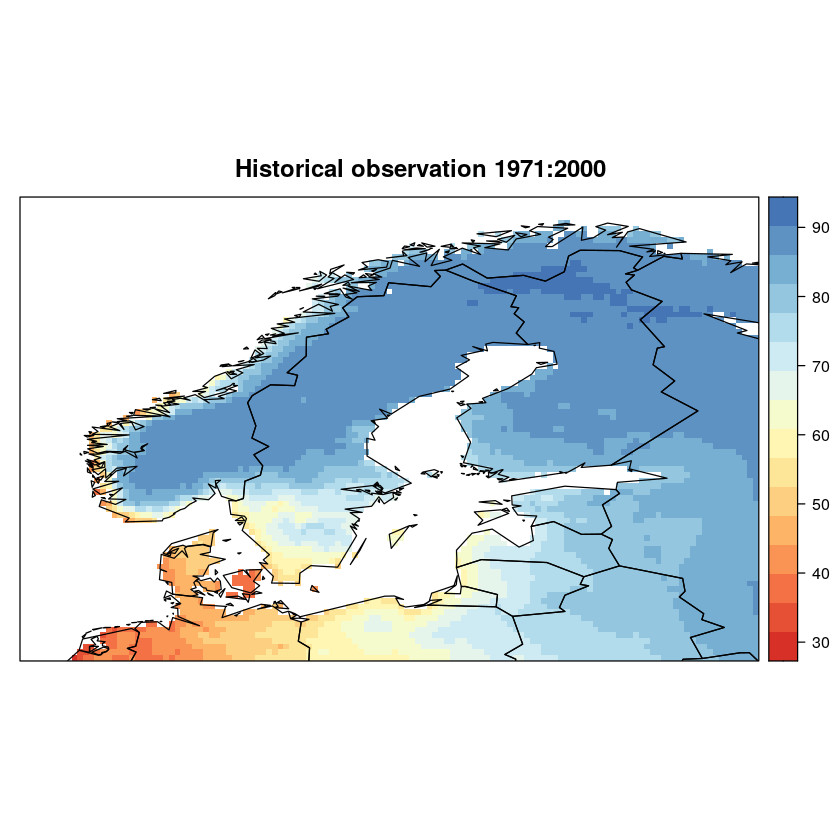

In [6]:
obs.annual <- aggregateGrid(obs, aggr.y = list(FUN = "sum"))

spatialPlot(climatology(obs.annual), main = 'Historical observation 1971:2000',
            backdrop.theme = "countries", 
           col.regions = colorRampPalette(rev(colsindex)))

En estás observaciones históricas vemos que en la mayoría de las regiones un alto porcentaje de los días de invierno se alcanza una temperatura mínima menor que 0ºC. En cuanto a las zonas "más cálidas" encontramos Dinamarca, la zona occidental de Polonia y algunas zonas costeras de Noruega, Suecia, Lituania y Letonia. 

Ahora, estudiaremos dos modelos y veremos tanto las simulaciones históricas y las predicciones futuras que realiza cada uno de ellos.

# Primer Modelo

El primer modelo pertenece al proyecto CORDEX, perteneciente a la institución ETH, el driving model es ICHEC-EC_EARTH, utiliza el ensemble r12i1p1 y el modelo es CCLM5.

In [7]:
hist_url <- "http://www.meteo.unican.es/tds5/dodsC/cordex/EUR-44/day/ETH/ICHEC-EC-EARTH_historical_r12i1p1_CCLM5-0-6_v1_day.ncml"
names(dataInventory(hist_url)) #vemos los nombres de las variables existentes
str(dataInventory(hist_url))

[2020-04-25 18:34:50] Doing inventory ...

[2020-04-25 18:34:51] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:34:51] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:34:51] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:34:51] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:34:51] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:34:51] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:34:51] Done.



[1] "orog"   "sftlf"  "pr"     "tas"    "tasmax" "tasmin"

[2020-04-25 18:34:51] Doing inventory ...

[2020-04-25 18:34:52] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:34:52] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:34:52] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:34:52] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:34:52] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:34:52] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:34:52] Done.



List of 6
 $ orog  :List of 4
  ..$ Description: chr "Surface Altitude"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "m"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00:00:00"
  .. .. ..$ Date_range: chr "1949-12-01T00:00:00Z - 1949-12-01T00:00:00Z"
  .. ..$ lat :List of 3
  .. .. ..$ Type  : chr "GeoY"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:103] -23.2 -22.8 -22.3 -21.9 -21.5 ...
  .. ..$ lon :List of 3
  .. .. ..$ Type  : chr "GeoX"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:106] -28.2 -27.8 -27.3 -26.9 -26.5 ...
 $ sftlf :List of 4
  ..$ Description: chr "Land Area Fraction"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "%"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00

A diferencia de las observaciones, observamos vemos que las unidades están en grados Kelvin. Con lo cual, vamos a hacer una conversión creando un diccionario. De este modo a todos los datos de temperatura mínima le restamos 273.15 para pasara a grados Celsius.

In [8]:
#vamos a cambiar de grados kelvin a celsius

file.create("dichist1.dic")
writeLines(c("identifier,short_name,time_step,lower_time_bound,upper_time_bound,cell_metod,offset,scale,deaccum,derived,interface",
             "tasmin,tasmin,24h,0,24,min,-273.15,1,0,0,"), "dichist1.dic")

[1] TRUE

In [9]:
#procedemos a cargar los datos en remoto
FDhist <- loadGridData(hist_url,
                   var = "tasmin",
                   season = c(12,1,2), 
                   years = 1971:2000,
                   lonLim = lon, 
                   latLim = lat,
                   time = "DD", 
                   aggr.m = "sum",
                   condition = "LT", 
                   threshold = 0,
                   dictionary = "dichist1.dic")

[2020-04-25 18:34:52] Defining harmonization parameters for variable "tasmin"

[2020-04-25 18:34:52] Opening dataset...

[2020-04-25 18:34:53] The dataset was successfuly opened

[2020-04-25 18:34:53] Defining geo-location parameters

[2020-04-25 18:34:53] Defining time selection parameters

NOTE: Daily data will be monthly aggregated

[2020-04-25 18:34:53] Retrieving data subset ...

Warning message:
“'C4R.vocabulary' is deprecated and will eventually be removed from loadeR.
Use 'C4R.vocabulary' from package climate4R.UDG instead.”
[2020-04-25 18:35:30] Done



Análogamente a las observaciones realizamos el agregado anual y realizamos el plot. Para ello, vamos a realizar una interpolación del grid que tenemos en los datos históricos con los de las observaciones, para que tengamos el mismo grid y un plot de las mismas dimensiones y estilo que el que teníamos en las observaciones. Del mismo modo, aplicamos una máscara para no pintar las zonas oceánicas, ya que nos vamos a fijar sólo en la superficie terrestre.

In [10]:
FDhist.annual <- aggregateGrid(FDhist, aggr.y = list(FUN = "sum"))

[2020-04-25 18:35:30] Performing annual aggregation...

[2020-04-25 18:35:30] Done.



In [11]:
#interpolación
FDhist.interp <- interpGrid(FDhist.annual, getGrid(obs))
eobs.mask <- gridArithmetics(obs.annual, 0, operator = "*")
FDhist.interp <- gridArithmetics(FDhist.interp, eobs.mask, operator = "+")

NOTE: argument 'bilin.method' ignored for nearest neighbour interpolation

[2020-04-25 18:35:30] Calculating nearest neighbors...

[2020-04-25 18:35:31] Performing nearest interpolation... may take a while

[2020-04-25 18:35:31] Done



Como todos los modelos, unos más y otros menos tienen bias, vamos a calcularlo y ver como se distribuye el bias del modelo en el mapa.

[2020-04-25 18:35:31] - Computing climatology...

[2020-04-25 18:35:31] - Done.



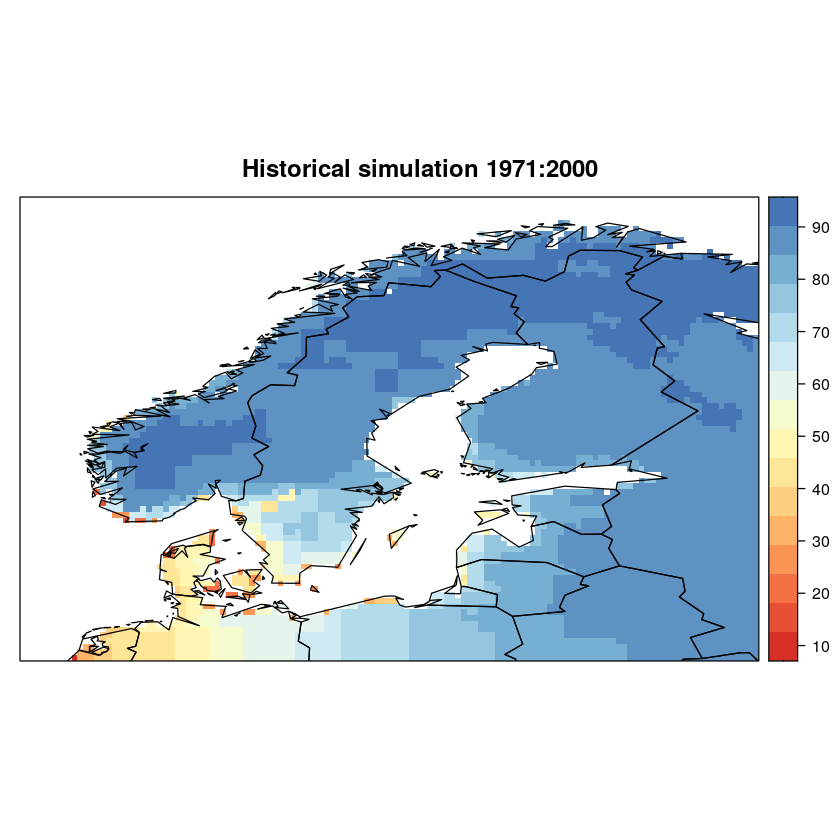

In [12]:
bias <- gridArithmetics(FDhist.interp, obs.annual, operator = "-")

spatialPlot(climatology(FDhist.interp), main = 'Historical simulation 1971:2000',
            backdrop.theme = "countries", 
            col.regions = colorRampPalette(rev(colsindex)))

Vemos que la visualización de las simulaciones históricas del modelo es bastante similar a las observaciones. Destaca que la visualización es más fría ya que vemos como, por ejemplo, Dinamarca es más naranja indicando más días en las que la temperatura mínima es menor que 0. Por otro lado, también en la zonas costeras del mar Báltico se ha pasado de una predominancia anaranjada a unos colores más fríos. Con toda esta información, podemos observar como se distribuye el bias del modelo.

[2020-04-25 18:35:37] - Computing climatology...

[2020-04-25 18:35:37] - Done.



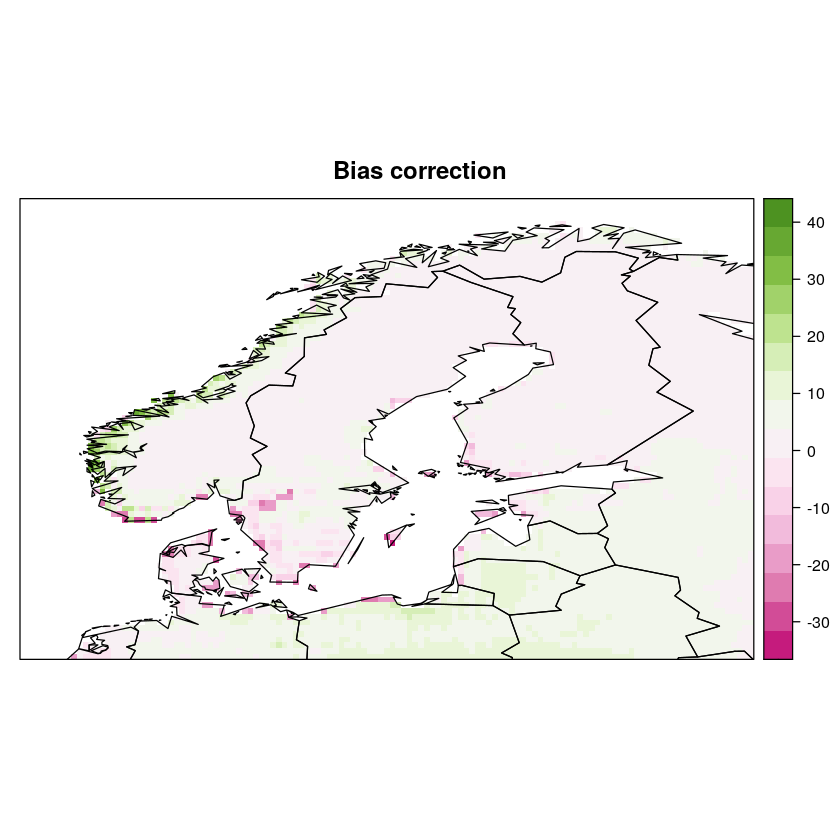

In [13]:
spatialPlot(climatology(bias), backdrop.theme = "countries", 
            main = 'Bias correction',
            col.regions = colorRampPalette(colsbias))

En la mayor parte parece que el bias no es muy cantoso. Donde más variación podemos observar es en la costa norte y noroeste de Noruega donde se predicen más días con temperatura mínima menor que 0 de los que realmente hay. En zonas puntuales de Dinamarca y el sur de Suecia se predicen menos días de los que en realidad hay.

A continuación, pasamos a analizar la simulación de datos futuros.

In [14]:
#datos de modelo futuro
rcp85 <- "http://www.meteo.unican.es/tds5/dodsC/cordex/EUR-44/day/ETH/ICHEC-EC-EARTH_rcp85_r12i1p1_CCLM5-0-6_v1_day.ncml"
names(dataInventory(rcp85))

str(dataInventory(rcp85))

[2020-04-25 18:35:41] Doing inventory ...

[2020-04-25 18:35:41] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:35:41] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:35:41] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:35:41] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:35:42] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:35:42] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:35:42] Done.



[1] "orog"   "sftlf"  "pr"     "tas"    "tasmax" "tasmin"

[2020-04-25 18:35:42] Doing inventory ...

[2020-04-25 18:35:42] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:35:42] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:35:42] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:35:42] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:35:42] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:35:43] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:35:43] Done.



List of 6
 $ orog  :List of 4
  ..$ Description: chr "Surface Altitude"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "m"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00:00:00"
  .. .. ..$ Date_range: chr "1949-12-01T00:00:00Z - 1949-12-01T00:00:00Z"
  .. ..$ lat :List of 3
  .. .. ..$ Type  : chr "GeoY"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:103] -23.2 -22.8 -22.3 -21.9 -21.5 ...
  .. ..$ lon :List of 3
  .. .. ..$ Type  : chr "GeoX"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:106] -28.2 -27.8 -27.3 -26.9 -26.5 ...
 $ sftlf :List of 4
  ..$ Description: chr "Land Area Fraction"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "%"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00

La selección es análoga a las realizadas anteriormente. Solamente se varía en la elección de los años que vamos a estudiar. La mayoría de los procedimientos que se llevan a cabo son similares al estudio de las simulaciones históricas.

In [15]:
FDrcp85 <- loadGridData(rcp85,
                       var = "tasmin",
                       season = c(12,1,2), 
                       years = 2070:2099,
                       lonLim = lon, 
                       latLim = lat,
                       time = "DD", 
                       aggr.m = "sum",
                       condition = "LT", 
                       threshold = 0,
                       dictionary = "dichist1.dic")

[2020-04-25 18:35:43] Defining harmonization parameters for variable "tasmin"

[2020-04-25 18:35:43] Opening dataset...

[2020-04-25 18:35:43] The dataset was successfuly opened

[2020-04-25 18:35:43] Defining geo-location parameters

[2020-04-25 18:35:44] Defining time selection parameters

NOTE: Daily data will be monthly aggregated

[2020-04-25 18:35:44] Retrieving data subset ...

Warning message:
“'C4R.vocabulary' is deprecated and will eventually be removed from loadeR.
Use 'C4R.vocabulary' from package climate4R.UDG instead.”
[2020-04-25 18:36:23] Done



In [16]:
FDrcp85.annual <- aggregateGrid(FDrcp85, aggr.y = list(FUN = "sum"))

[2020-04-25 18:36:23] Performing annual aggregation...

[2020-04-25 18:36:23] Done.



Como novedad, podemos calcular la señal de cambio climático, ya que tenemos los datos de simulaciones históricas y los datos de simulaciones futuras.

In [17]:
FDrcp85.interp <- interpGrid(FDrcp85.annual, getGrid(obs.annual))
FDrcp85.interp <- gridArithmetics(FDrcp85.interp, eobs.mask, operator = "+")

CCsignal <- gridArithmetics(FDrcp85.interp, 
                            FDhist.interp,
                            operator = "-")

NOTE: argument 'bilin.method' ignored for nearest neighbour interpolation

[2020-04-25 18:36:23] Calculating nearest neighbors...

[2020-04-25 18:36:24] Performing nearest interpolation... may take a while

[2020-04-25 18:36:24] Done



[2020-04-25 18:36:25] - Computing climatology...

[2020-04-25 18:36:25] - Done.



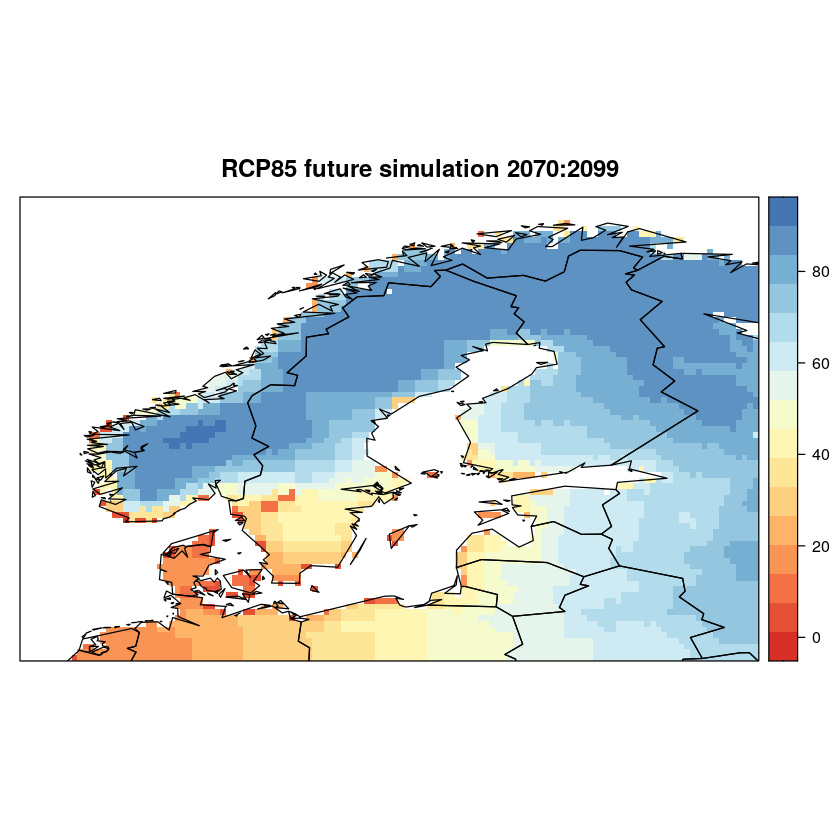

In [18]:
spatialPlot(climatology(FDrcp85.interp), main = 'RCP85 future simulation 2070:2099',
            backdrop.theme = "countries" ,col.regions = colorRampPalette(rev(colsindex)))


[2020-04-25 18:36:30] - Computing climatology...

[2020-04-25 18:36:30] - Done.



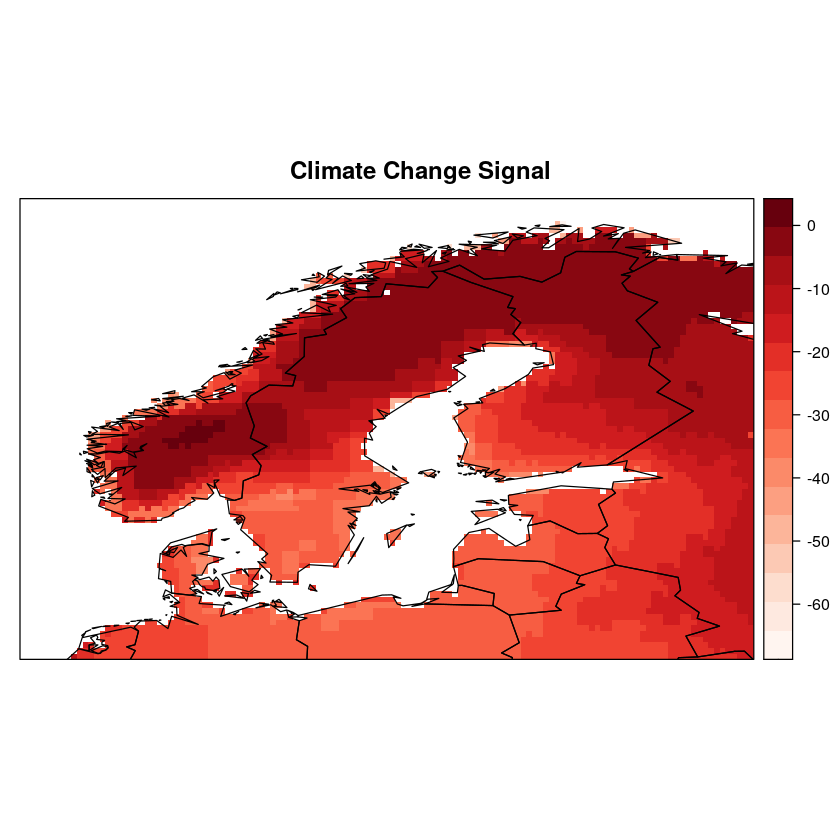

In [19]:
spatialPlot(climatology(CCsignal), backdrop.theme = "countries",
            main = 'Climate Change Signal', col.regions = colorRampPalette(colsdelta))


Notamos que el mapa de simulaciones futuras es mucho más cálido que el que nos encontrabamos en las observaciones. Destacar que la disminución de días con heladas se produce a mayor grado en las siguientes localizaciones:
* Dinamarca
* Norte de Alemania
* Costa de Noruega
* Sur de Suecia
* Suroeste de Finlandia
* Norte de Polonia
* Costa de los países báticos

Por otro lado, vemos como donde más se mantenien estos días es en las zonas continentales de Escandinavia. Es decir, nos referimos a la zona central de Noruega y el norte de Suecia y Finlandia. Estas zonas es donde más se conservan estos días en comparación con el resto de lugares.

Sin embargo, tengamos en cuenta que no hemos realizado la correción del bias del modelo. Por este motivo, nuestra siguiente acción es corregir este bias y analizar las nuevas visualizaciones.

In [20]:
FDrcp85.bc <- biasCorrection(y = obs, x = FDhist, newdata = FDrcp85, 
                         method = "scaling", scaling.type = "additive")

FDrcp85.bc.annual <- aggregateGrid(FDrcp85.bc, aggr.y = list(FUN = "sum"))

CCsignal.bc <- gridArithmetics(FDrcp85.bc.annual, 
                               obs.annual,
                               operator = "-")

[2020-04-25 18:36:36] Argument precipitation is set as FALSE, please ensure that this matches your data.

[2020-04-25 18:36:37] Number of windows considered: 1...

[2020-04-25 18:36:37] Bias-correcting 1 members separately...

[2020-04-25 18:36:38] Done.

[2020-04-25 18:36:38] Performing annual aggregation...

[2020-04-25 18:36:39] Done.



In [21]:
CCsignal.bc1 <- CCsignal.bc
FDrcp85.bc.annual1 <- FDrcp85.bc.annual

[2020-04-25 18:36:39] - Computing climatology...

[2020-04-25 18:36:39] - Done.



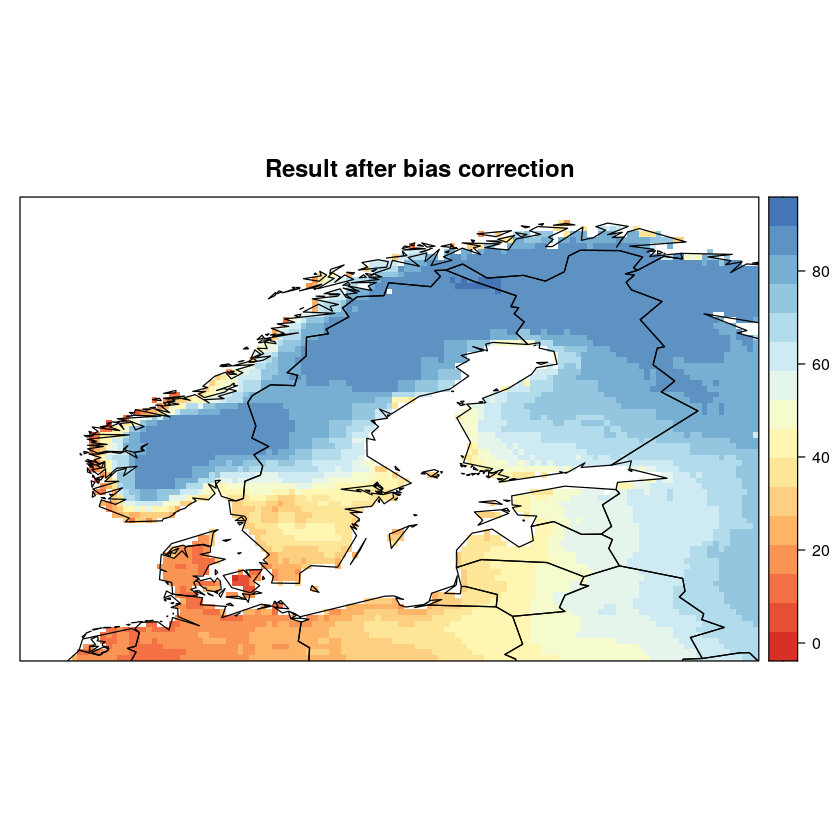

In [22]:
spatialPlot(climatology(FDrcp85.bc.annual), backdrop.theme = "countries", 
            main = 'Result after bias correction', 
            col.regions = colorRampPalette(rev(colsindex)))

[2020-04-25 18:36:43] - Computing climatology...

[2020-04-25 18:36:43] - Done.



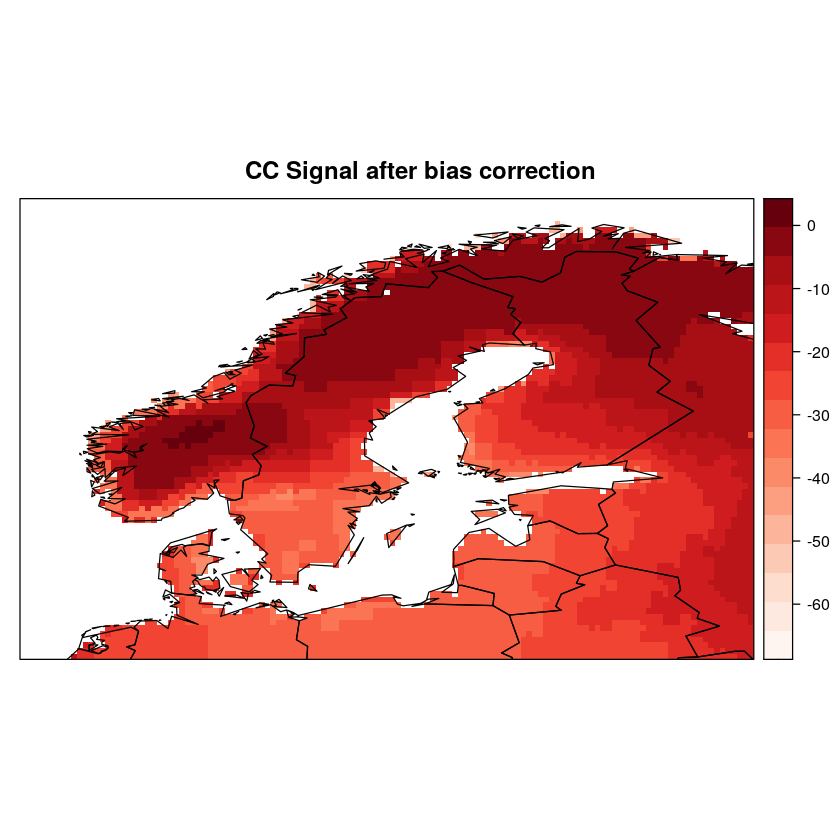

In [23]:
spatialPlot(climatology(CCsignal.bc), backdrop.theme = "countries",
            main = 'CC Signal after bias correction', 
            col.regions = colorRampPalette(colsdelta))

Tras la corrección del bias, observamos como las zonas cálidas y, en consecuencia, la señal de cambio climático va adentrandose ligeramente desde las costas hacia el continente. Es decir, nos referimos a que en zonas donde en el mapa sin corregir el bias teniamos como ligeramente la costa de Noruega tenía una tonalidad más calida, ahora esa zona es ligeramente más grande ganando en terreno a zona continental que en el modelo sin corregir el bias era más fría. Del mismo modo se produce en los países bálticos. Las zonas más conservativas en el sentido de días de heladas siguen siendo las mencionadas en el modelo sin el bias corregido.

Con lo cual, según este modelo parece ser que las zonas que tienen una mayor señal de cambio climático son los países del báltico, Polonia, Dinamarca, norte de Alemania, la zona costera de Noruega y las zonas sur de Suecia y Finlandia.
Donde tenemos una menor señal de cambio climático es en el norte de Suecia, zona central de Noruega y norte de Finlandia.

# Segundo Modelo

En este apartado solo nos dedicaremos a comentar las variaciones que encontramos entre este modelo y el primero, debido a que el análisis es práctimente análogo. Este modelo también pertenece a la instituición ETH y es un modelo CCLM5. Sin embargo, utiliza como driving model MIROC-MIROC5 y como ensemble r1i1p1. Veremos como se comporta este modelo en comparación con el primero.

Volvemos a recalcar que la ausencia de comentarios en ciertas celdas se debe a que no hay diferencias en el procedimiento en comparación con el primer modelo.

In [24]:
hist_url <- 'http://www.meteo.unican.es/tds5/dodsC/cordex/EUR-44/day/ETH/MIROC-MIROC5_historical_r1i1p1_CCLM5-0-6_v1_day.ncml'
names(dataInventory(hist_url)) #vemos los nombres de las variables existentes
str(dataInventory(hist_url))


[2020-04-25 18:36:48] Doing inventory ...

[2020-04-25 18:36:48] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:36:49] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:36:49] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:36:49] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:36:49] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:36:49] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:36:49] Done.



[1] "orog"   "sftlf"  "pr"     "tas"    "tasmax" "tasmin"

[2020-04-25 18:36:49] Doing inventory ...

[2020-04-25 18:36:49] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:36:49] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:36:50] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:36:50] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:36:50] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:36:50] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:36:50] Done.



List of 6
 $ orog  :List of 4
  ..$ Description: chr "Surface Altitude"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "m"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00:00:00"
  .. .. ..$ Date_range: chr "1949-12-01T00:00:00Z - 1949-12-01T00:00:00Z"
  .. ..$ lat :List of 3
  .. .. ..$ Type  : chr "GeoY"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:103] -23.2 -22.8 -22.3 -21.9 -21.5 ...
  .. ..$ lon :List of 3
  .. .. ..$ Type  : chr "GeoX"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:106] -28.2 -27.8 -27.3 -26.9 -26.5 ...
 $ sftlf :List of 4
  ..$ Description: chr "Land Area Fraction"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "%"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00

In [25]:
#vamos a cambiar de grados kelvin a celsius

file.create("dichist1.dic")
writeLines(c("identifier,short_name,time_step,lower_time_bound,upper_time_bound,cell_metod,offset,scale,deaccum,derived,interface",
             "tasmin,tasmin,24h,0,24,min,-273.15,1,0,0,"), "dichist1.dic")

[1] TRUE

In [26]:
#procedemos a cargar los datos en remoto
FDhist <- loadGridData(hist_url,
                   var = "tasmin",
                   season = c(12,1,2), 
                   years = 1971:2000,
                   lonLim = lon, 
                   latLim = lat,
                   time = "DD", 
                   aggr.m = "sum",
                   condition = "LT", 
                   threshold = 0,
                   dictionary = "dichist1.dic")

[2020-04-25 18:36:50] Defining harmonization parameters for variable "tasmin"

[2020-04-25 18:36:50] Opening dataset...

[2020-04-25 18:36:51] The dataset was successfuly opened

[2020-04-25 18:36:51] Defining geo-location parameters

[2020-04-25 18:36:51] Defining time selection parameters

NOTE: Daily data will be monthly aggregated

[2020-04-25 18:36:51] Retrieving data subset ...

Warning message:
“'C4R.vocabulary' is deprecated and will eventually be removed from loadeR.
Use 'C4R.vocabulary' from package climate4R.UDG instead.”
[2020-04-25 18:37:27] Done



In [27]:
FDhist.annual <- aggregateGrid(FDhist, aggr.y = list(FUN = "sum"))

[2020-04-25 18:37:27] Performing annual aggregation...

[2020-04-25 18:37:28] Done.



In [28]:
#interpolación
FDhist.interp <- interpGrid(FDhist.annual, getGrid(obs))
eobs.mask <- gridArithmetics(obs.annual, 0, operator = "*")
FDhist.interp <- gridArithmetics(FDhist.interp, eobs.mask, operator = "+")

NOTE: argument 'bilin.method' ignored for nearest neighbour interpolation

[2020-04-25 18:37:28] Calculating nearest neighbors...

[2020-04-25 18:37:29] Performing nearest interpolation... may take a while

[2020-04-25 18:37:29] Done



[2020-04-25 18:37:29] - Computing climatology...

[2020-04-25 18:37:29] - Done.



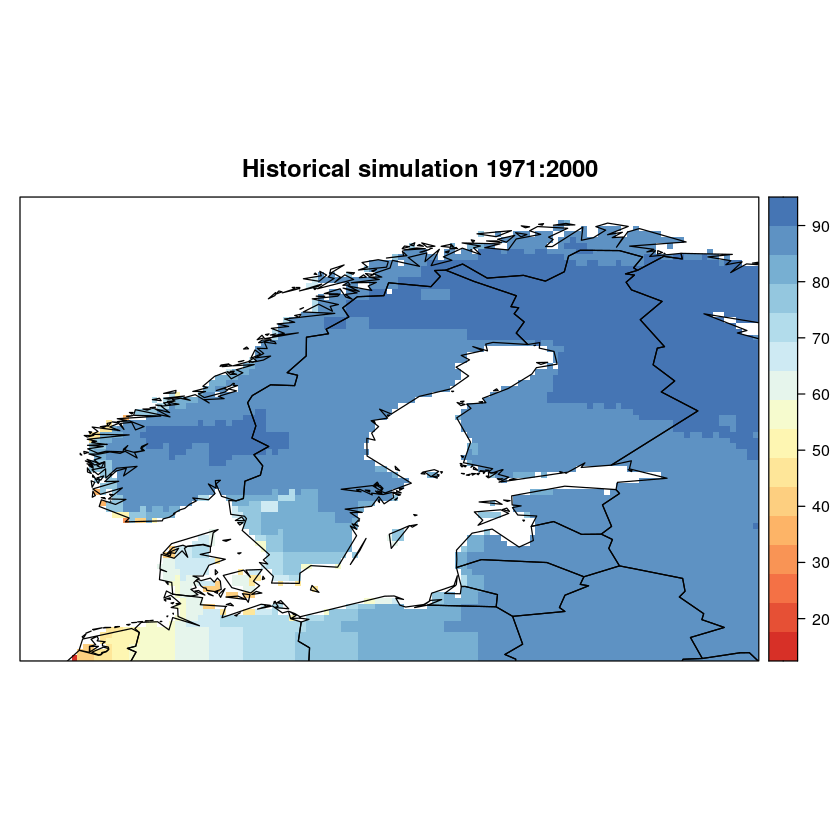

In [29]:
bias <- gridArithmetics(FDhist.interp, obs.annual, operator = "-")

spatialPlot(climatology(FDhist.interp), main = 'Historical simulation 1971:2000',
            backdrop.theme = "countries", 
            col.regions = colorRampPalette(rev(colsindex)))

Notamos que la simulación histórica de lugar a un mapa generalmente más frío comparado con las observaciones históricas y el las simulaciones históricas del primer modelo. En las observaciones destacábamos como el sur de Suecia, parte de la costa noruega, Dinamárca y los paises báticos tenían una tonalidad más cálida. En efecto, en las simulaciones históricas del primer modelo el mapa era más frío que en las observaciones, pero este segundo modelo nos da una representación aún más fría. Solo contemplamos pequeñas zonas anaranjadas en zonas puntales de Dinamarca y Alemania occidental. 


[2020-04-25 18:37:34] - Computing climatology...

[2020-04-25 18:37:34] - Done.



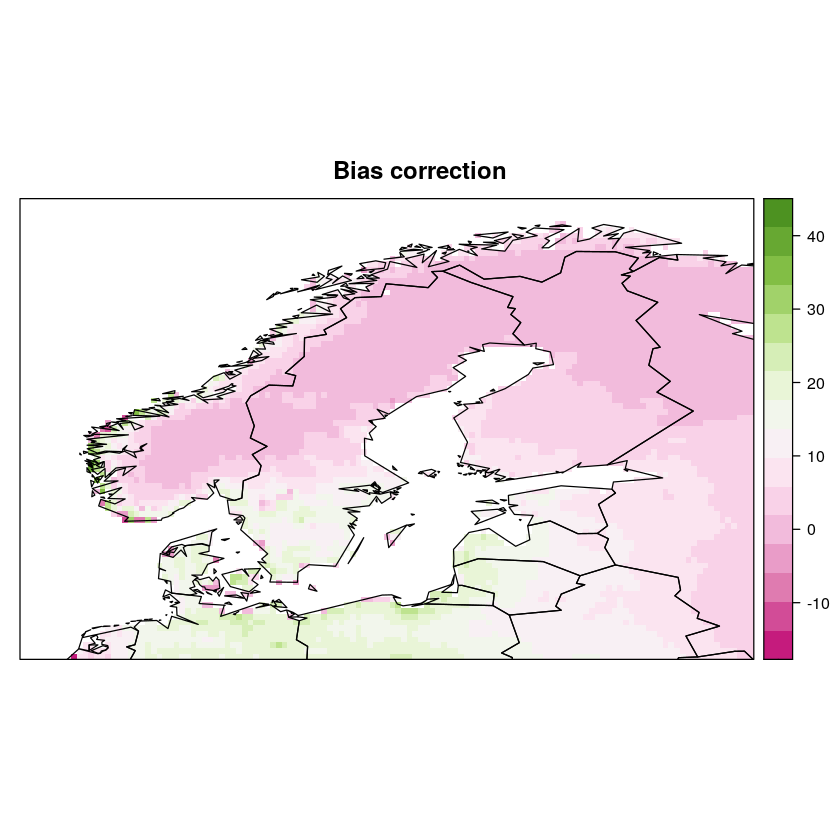

In [30]:
spatialPlot(climatology(bias), backdrop.theme = "countries", 
            main = 'Bias correction',
            col.regions = colorRampPalette(colsbias))

Es bastante visual y bastante claro que este modelo tiene mayor bias en general en todo el territorio que el primer modelo. Sin embargo hay que tener cuenta la escala, ya que en esta gráfica el 0 se coloca sobre un color rosáceo, no sobre el color blanco como ocurría en el primer modelo. Si recordamos, el bias de primer modelo destacaba que se predecían más días de los que había en la costa de Noruega y menos en zonas puntuales de Dinamarca y el sur de Noruega y Suecia. El resto del mapa era bastante transparente indicando así poco sesgo. En este modelo cabe destacar que, zonas donde aparentemente no había sesgo en el primer modelo como el norte de los países de Escandinavia, en esta visualización se tiene que hay un poco más bias en las mencionadas localizaciones. Vemos que destaca también el bias de días que se predicen más de los que hay en zonas de Alemania, Polonia, Dinamarca o Lituania. 

In [31]:
#datos de modelo futuro
rcp85 <- 'http://www.meteo.unican.es/tds5/dodsC/cordex/EUR-44/day/ETH/MIROC-MIROC5_rcp85_r1i1p1_CCLM5-0-6_v1_day.ncml'
names(dataInventory(rcp85))

str(dataInventory(rcp85))

[2020-04-25 18:37:41] Doing inventory ...

[2020-04-25 18:37:42] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:37:42] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:37:42] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:37:42] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:37:42] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:37:43] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:37:43] Done.



[1] "orog"   "sftlf"  "pr"     "tas"    "tasmax" "tasmin"

[2020-04-25 18:37:43] Doing inventory ...

[2020-04-25 18:37:43] Retrieving info for 'orog' (5 vars remaining)

[2020-04-25 18:37:43] Retrieving info for 'sftlf' (4 vars remaining)

[2020-04-25 18:37:44] Retrieving info for 'pr' (3 vars remaining)

[2020-04-25 18:37:44] Retrieving info for 'tas' (2 vars remaining)

[2020-04-25 18:37:44] Retrieving info for 'tasmax' (1 vars remaining)

[2020-04-25 18:37:44] Retrieving info for 'tasmin' (0 vars remaining)

[2020-04-25 18:37:44] Done.



List of 6
 $ orog  :List of 4
  ..$ Description: chr "Surface Altitude"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "m"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00:00:00"
  .. .. ..$ Date_range: chr "1949-12-01T00:00:00Z - 1949-12-01T00:00:00Z"
  .. ..$ lat :List of 3
  .. .. ..$ Type  : chr "GeoY"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:103] -23.2 -22.8 -22.3 -21.9 -21.5 ...
  .. ..$ lon :List of 3
  .. .. ..$ Type  : chr "GeoX"
  .. .. ..$ Units : chr "degrees"
  .. .. ..$ Values: num [1:106] -28.2 -27.8 -27.3 -26.9 -26.5 ...
 $ sftlf :List of 4
  ..$ Description: chr "Land Area Fraction"
  ..$ DataType   : chr "float"
  ..$ Units      : chr "%"
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr ".0 days"
  .. .. ..$ Units     : chr "days since 1949-12-01 00

In [32]:
FDrcp85 <- loadGridData(rcp85,
                       var = "tasmin",
                       season = c(12,1,2), 
                       years = 2070:2099,
                       lonLim = lon, 
                       latLim = lat,
                       time = "DD", 
                       aggr.m = "sum",
                       condition = "LT", 
                       threshold = 0,
                       dictionary = "dichist1.dic")

[2020-04-25 18:37:44] Defining harmonization parameters for variable "tasmin"

[2020-04-25 18:37:44] Opening dataset...

[2020-04-25 18:37:45] The dataset was successfuly opened

[2020-04-25 18:37:45] Defining geo-location parameters

[2020-04-25 18:37:46] Defining time selection parameters

NOTE: Daily data will be monthly aggregated

[2020-04-25 18:37:46] Retrieving data subset ...

Warning message:
“'C4R.vocabulary' is deprecated and will eventually be removed from loadeR.
Use 'C4R.vocabulary' from package climate4R.UDG instead.”
[2020-04-25 18:38:22] Done



In [33]:
FDrcp85.annual <- aggregateGrid(FDrcp85, aggr.y = list(FUN = "sum"))

[2020-04-25 18:38:22] Performing annual aggregation...

[2020-04-25 18:38:22] Done.



In [34]:
FDrcp85.interp <- interpGrid(FDrcp85.annual, getGrid(obs.annual))
FDrcp85.interp <- gridArithmetics(FDrcp85.interp, eobs.mask, operator = "+")

CCsignal <- gridArithmetics(FDrcp85.interp, 
                            FDhist.interp,
                            operator = "-")

NOTE: argument 'bilin.method' ignored for nearest neighbour interpolation

[2020-04-25 18:38:22] Calculating nearest neighbors...

[2020-04-25 18:38:23] Performing nearest interpolation... may take a while

[2020-04-25 18:38:23] Done



[2020-04-25 18:38:23] - Computing climatology...

[2020-04-25 18:38:23] - Done.



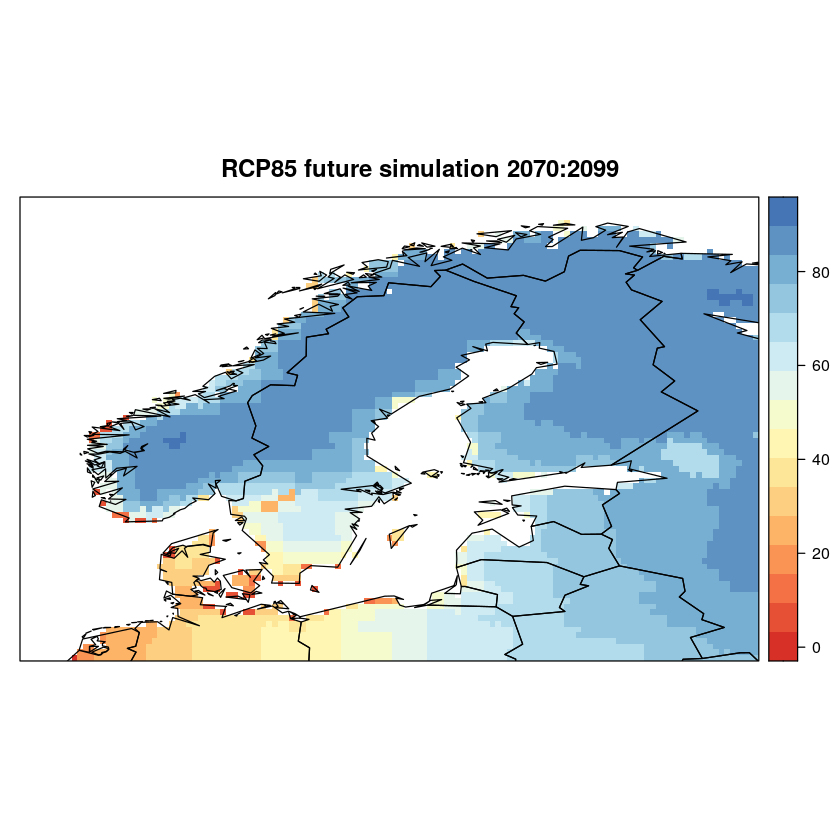

In [35]:
spatialPlot(climatology(FDrcp85.interp), main = 'RCP85 future simulation 2070:2099',
            backdrop.theme = "countries" ,col.regions = colorRampPalette(rev(colsindex)))


El plot sin la correción del bias de este modelo es bastante similar al realizado con el primer modelo. Es ligeramente un modelo más frío. Destaca la tonalidad cálida en Dinamarca, Alemania, Polonia occidental y una pequeña porción del sur de Suecia.

En el siguiente mapa, observamos la señal de cambio climático que comparte las características mencionadas con esta representación de simulaciones futuras.

El siguiente paso a realizar es corregir el bias y sacar así las conclusiones finales para este modelo.

[2020-04-25 18:38:29] - Computing climatology...

[2020-04-25 18:38:29] - Done.



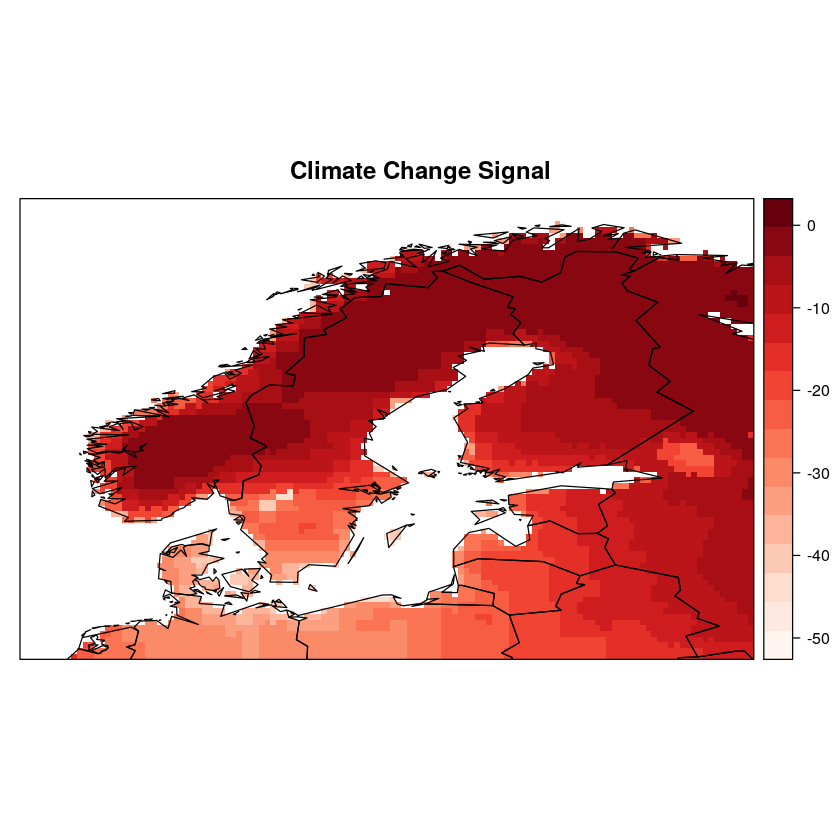

In [36]:
spatialPlot(climatology(CCsignal), backdrop.theme = "countries",
            main = 'Climate Change Signal', col.regions = colorRampPalette(colsdelta))


In [37]:
#bias correction######################################
FDrcp85.bc <- biasCorrection(y = obs, x = FDhist, newdata = FDrcp85, 
                         method = "scaling", scaling.type = "additive")

FDrcp85.bc.annual <- aggregateGrid(FDrcp85.bc, aggr.y = list(FUN = "sum"))

CCsignal.bc <- gridArithmetics(FDrcp85.bc.annual, 
                               obs.annual,
                               operator = "-")

[2020-04-25 18:38:35] Argument precipitation is set as FALSE, please ensure that this matches your data.

[2020-04-25 18:38:35] Number of windows considered: 1...

[2020-04-25 18:38:35] Bias-correcting 1 members separately...

[2020-04-25 18:38:36] Done.

[2020-04-25 18:38:36] Performing annual aggregation...

[2020-04-25 18:38:37] Done.



In [38]:
CCsignal.bc2 <- CCsignal.bc
FDrcp85.bc.annual2 <- FDrcp85.bc.annual

[2020-04-25 18:38:37] - Computing climatology...

[2020-04-25 18:38:37] - Done.



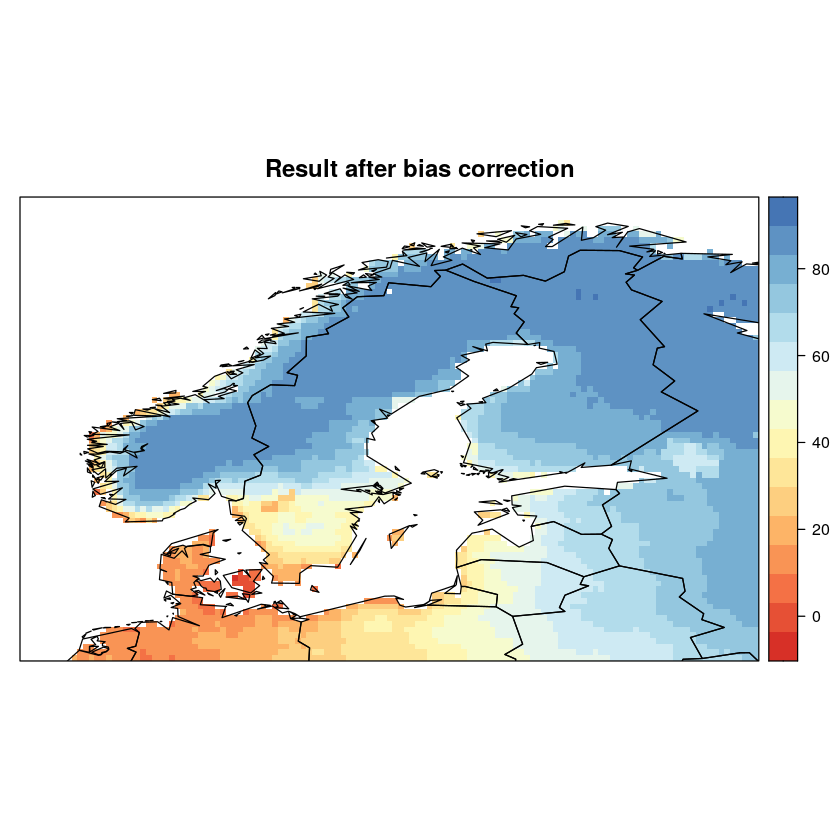

In [39]:
spatialPlot(climatology(FDrcp85.bc.annual), backdrop.theme = "countries", 
            main = 'Result after bias correction',
            col.regions = colorRampPalette(rev(colsindex)))

[2020-04-25 18:38:41] - Computing climatology...

[2020-04-25 18:38:41] - Done.



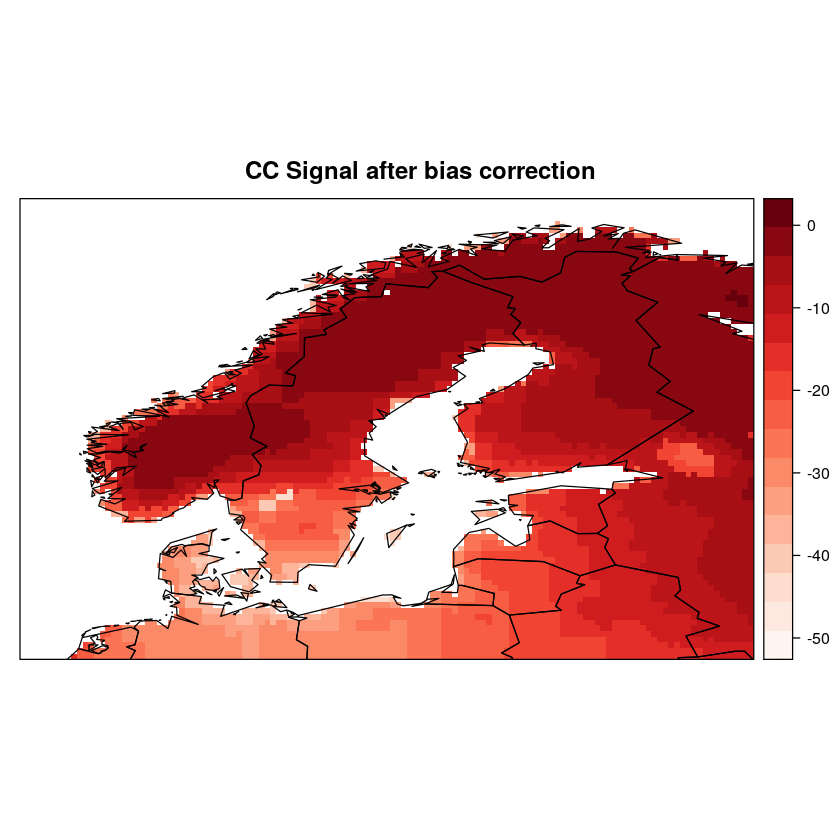

In [40]:
spatialPlot(climatology(CCsignal.bc), backdrop.theme = "countries",
            main = 'CC Signal after bias correction',
            col.regions = colorRampPalette(colsdelta))

Podemos notar con la visualización de las simulaciones futuras y corregidas y el mapa de señal de cambio climático que tanto en este modelo como el anterior las señales de cambio predominan en:
* Dinamarca
* Polonia
* Norte de Alemania
* Costa de Noruega
* Sur de Suecia y Finlandia( aquí hay menos cambio)

Además, donde tenemos una menor señal de cambio climático es en el norte de Suecia, zona central de Noruega y norte de Finlandia.

Vemos que la señal de cambio de este modelo y el primero tienen un patrón similar. Podríamos atrevernos a decir que este modelo es más conservativo en cuanto a señales de cambio y genera mapas más fríos que el primer modelo.

Para acabar esta práctica, vamos a comparar los resultados de la predicción futura del primer modelo con la del segundo, para poder observar donde existen las diferencias más sustanciales.

In [41]:
diff_models <- gridArithmetics(FDrcp85.bc.annual1,FDrcp85.bc.annual2 , operator = "-")

[2020-04-25 18:38:46] - Computing climatology...

[2020-04-25 18:38:46] - Done.



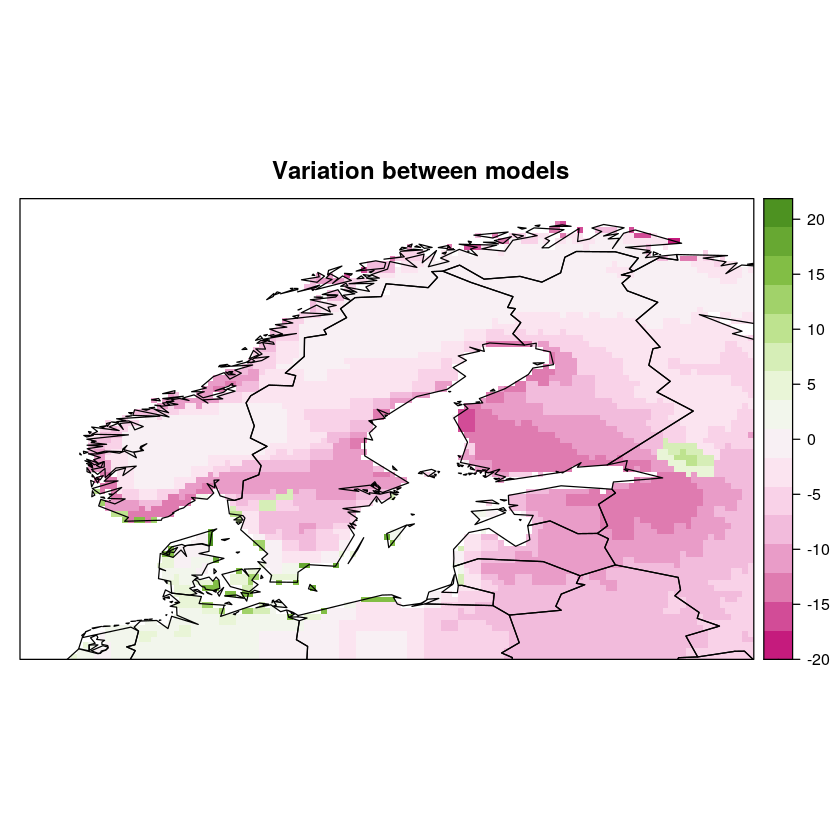

In [42]:
spatialPlot(climatology(diff_models), backdrop.theme = "countries", 
            main = 'Variation between models',
            col.regions = colorRampPalette(colsbias))

Con esta visualización podemos observar mejor las diferencias entre las simulaciones futuras entre el primer modelo y segundo. Es más facil que comparando sus plots, porque como podiamos ver antes, en algunos casos la escala era ligeramente diferente y podía dar lugar a errores en la interpretación.

Podemos ver que donde más parejosestán los modelos es en la zona central de Noruega, el norte de Suecia, norte de Finlandia e incluso parte del norte de Alemania y Dinamarca. Recordemos que las tres primeras zonas mencionadas se observaba de ellas que eran las más conservativas en cuanto a días de heladas hablamos, es decir, donde menos señal de cambio climático existía y además las zonas donde se mantenían los días más fríos.

Por otro lado, vemos como el primer modelo predice más días fríos en unos pocos lugares concretos de Dinamarca y el norte de Alemania, una zona al este de Finlandia y un par de zonas en la costa sur de Noruega y Suecia. 

En general, el segundo modelo es más frío que el primero si lo analizamos globalmente. Nuestro análisis que habíamos hecho comparando plots de los modelos es correcto por tanto. Vemos como el segundo modelo predice más días fríos que el primero en el resto de zonas: costa de Noruega, sur de Suecia, sur de Finlandia y los paises del Báltico. Si hacemos un poco de memoria, generalmente estas zonas mencionadas tenían unas texturas cálidas en el primer modelo en dichas localizaciones.

Finalizando, esta sería la conclusión obtenida entre la comparación de los modelos. Como conclusión general teniendo en cuenta el patrón que siguen ambos, un patrón bastante similar, el predominio de una mayor señal de cambio climático se encuentra en Dinamarca, Polonia, norte de Alemania, costa de Noruega, sur de Suecia y sur de Finlandia.

Además, donde tenemos una menor señal de cambio climático es en el norte de Suecia, zona central de Noruega y norte de Finlandia, regiones que están apuntando a ser más conservativas en cuanto a número de días de heladas en invierno, según los modelos estudiados.